Part 2:  Examine the impact of regularization and dropout. 
Use the python scripts with fashion_mnist data in HW 3 and testify the impact of adding or without adding the regularization and the impact of adding or without adding the dropout. 



Without adding Regularization and Dropout

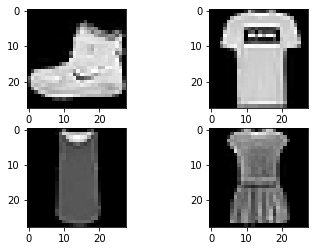

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.5062 - accuracy: 0.8224 - val_loss: 0.4193 - val_accuracy: 0.8530
Epoch 2/20
 - 10s - loss: 0.3758 - accuracy: 0.8669 - val_loss: 0.3920 - val_accuracy: 0.8595
Epoch 3/20
 - 9s - loss: 0.3316 - accuracy: 0.8799 - val_loss: 0.3761 - val_accuracy: 0.8624
Epoch 4/20
 - 9s - loss: 0.3037 - accuracy: 0.8902 - val_loss: 0.3445 - val_accuracy: 0.8761
Epoch 5/20
 - 9s - loss: 0.2865 - accuracy: 0.8954 - val_loss: 0.3572 - val_accuracy: 0.8647
Epoch 6/20
 - 9s - loss: 0.2702 - accuracy: 0.9015 - val_loss: 0.3385 - val_accuracy: 0.8760
Epoch 7/20
 - 9s - loss: 0.2603 - accuracy: 0.9032 - val_loss: 0.3201 - val_accuracy: 0.8847
Epoch 8/20
 - 9s - loss: 0.2435 - accuracy: 0.9101 - val_loss: 0.3113 - val_accuracy: 0.8876
Epoch 9/20
 - 9s - loss: 0.2351 - accuracy: 0.9129 - val_loss: 0.3198 - val_accuracy: 0.8878
Epoch 10/20
 - 9s - loss: 0.2231 - accuracy: 0.9174 - val_loss: 0.3165 - val_accuracy: 0.8891
Epoch 11/20
 - 9s 

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Task 1: add the regularization  

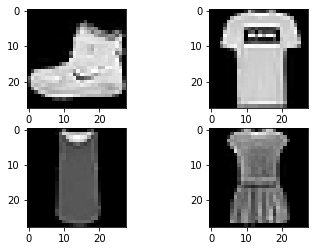

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 21s - loss: 0.1515 - accuracy: 0.9441 - val_loss: 0.3342 - val_accuracy: 0.8890
Epoch 2/20
 - 10s - loss: 0.1434 - accuracy: 0.9470 - val_loss: 0.3195 - val_accuracy: 0.9012
Epoch 3/20
 - 12s - loss: 0.1414 - accuracy: 0.9465 - val_loss: 0.3488 - val_accuracy: 0.8898
Epoch 4/20
 - 12s - loss: 0.1314 - accuracy: 0.9519 - val_loss: 0.3258 - val_accuracy: 0.8975
Epoch 5/20
 - 12s - loss: 0.1292 - accuracy: 0.9522 - val_loss: 0.3654 - val_accuracy: 0.8855
Epoch 6/20
 - 11s - loss: 0.1256 - accuracy: 0.9545 - val_loss: 0.3338 - val_accuracy: 0.8963
Epoch 7/20
 - 10s - loss: 0.1226 - accuracy: 0.9559 - val_loss: 0.3395 - val_accuracy: 0.8971
Epoch 8/20
 - 11s - loss: 0.1171 - accuracy: 0.9564 - val_loss: 0.3493 - val_accuracy: 0.8970
Epoch 9/20
 - 12s - loss: 0.1114 - accuracy: 0.9589 - val_loss: 0.3360 - val_accuracy: 0.8975
Epoch 10/20
 - 11s - loss: 0.1107 - accuracy: 0.9595 - val_loss: 0.3558 - val_accuracy: 0.8941
Epoch 11/

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    network = models.Sequential()
    network.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(28 * 28,)))
#     network.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dense(10, activation='softmax'))

# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Task 2: add the dropout rate 

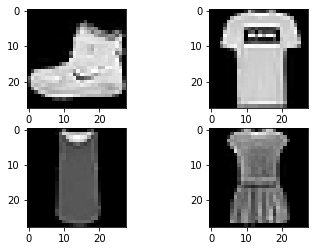

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.0820 - accuracy: 0.9697 - val_loss: 0.3938 - val_accuracy: 0.8982
Epoch 2/20
 - 9s - loss: 0.0755 - accuracy: 0.9719 - val_loss: 0.4124 - val_accuracy: 0.8926
Epoch 3/20
 - 8s - loss: 0.0782 - accuracy: 0.9711 - val_loss: 0.4261 - val_accuracy: 0.8959
Epoch 4/20
 - 8s - loss: 0.0696 - accuracy: 0.9744 - val_loss: 0.4042 - val_accuracy: 0.9014
Epoch 5/20
 - 8s - loss: 0.0696 - accuracy: 0.9743 - val_loss: 0.4118 - val_accuracy: 0.8998
Epoch 6/20
 - 8s - loss: 0.0707 - accuracy: 0.9740 - val_loss: 0.4182 - val_accuracy: 0.8939
Epoch 7/20
 - 8s - loss: 0.0714 - accuracy: 0.9731 - val_loss: 0.4170 - val_accuracy: 0.9001
Epoch 8/20
 - 9s - loss: 0.0647 - accuracy: 0.9765 - val_loss: 0.4138 - val_accuracy: 0.9017
Epoch 9/20
 - 8s - loss: 0.0655 - accuracy: 0.9764 - val_loss: 0.4365 - val_accuracy: 0.8949
Epoch 10/20
 - 8s - loss: 0.0624 - accuracy: 0.9770 - val_loss: 0.4262 - val_accuracy: 0.8997
Epoch 11/20
 - 8s 

In [ ]:
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import fashion_mnist
from keras import models
from keras import layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
    network = models.Sequential()
    network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
    network.add(layers.Dropout(0.5))
#     network.add(layers.Dropout(0.6))
#     network.add(layers.Dropout(0.7))
    network.add(layers.Dense(10, activation='softmax'))

# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
    
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

With the increase of accuracy rate  and the decrease in loss function and baseline error while adding different regularization factors and dropout rates,we can imply that the overfitting problem in the test data set has been released.